
#    Deep Learning Course 2019
######  Lecturer: Assistant prof. Siamak Mehrkanoon
####  =====================================================================================================

## Assignment-1:

### Download the Iris data and explore it, (visualize it, how many classes, instances, features, etc)
### Select feature number 0 and 2 and the first 100 samples and do the following analysis: 

### 1) Implement the logistic regression model that discussed in the class (with and without regularization). Use Gradient descent algorithm for updating the parameters. Plot the results.

### 2) Explore the influence of learning rate on the convergence of the model. Tune the learning rate.

### 3) Repeat steps 1-4 for different randomly selected features (e.g. 1 and 3 or 2 and 3) and compare the results.

### 4) Give the option to the users to select whatever combination of features they want and your code will do the rest.

### 5)  Try your model on Monk2 dataset and report the results, (test accuracy, training accuracy, optimal learning rate, loss value). Use the last 20% of the data as test.



In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.head()
df = df[:100]
classes = df[4].unique()

# Normalize the date
samples = df.copy()
samples[4][samples[4] == classes[0]] = 0
samples[4][samples[4] == classes[1]] = 1
samples = preprocessing.MinMaxScaler().fit_transform(samples)
#samples = preprocessing.scale(samples)
#forwardPass(df[0])
#print(samples)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


Looking at the dataset and having a look at how many classes and min max of each features. Have a look whether there are missing values. If so, how do I fill them up? How many samples do we have?

In [87]:
print(f'Number of samples: {len(df)}')
print(f'Classes: {classes}')
print(f'First Feature  min: {np.min(df[0])} max: {np.max(df[0])} mean: {np.mean(df[0]):.2f} median: {np.median(df[0])} Std: {np.std(df[0]):.2f}')
print(f'Second Feature min: {np.min(df[1])} max: {np.max(df[1])} mean: {np.mean(df[1]):.2f} median: {np.median(df[1])} Std: {np.std(df[1]):.2f}')
print(f'Third Feature  min: {np.min(df[2])} max: {np.max(df[2])} mean: {np.mean(df[2]):.2f} median: {np.median(df[2])} Std: {np.std(df[2]):.2f}')
print(f'Fourth Feature min: {np.min(df[3])} max: {np.max(df[3])} mean: {np.mean(df[3]):.2f} median: {np.median(df[3])} Std: {np.std(df[3]):.2f}')
 

Number of samples: 100
Classes: ['Iris-setosa' 'Iris-versicolor']
First Feature  min: 4.3 max: 7.0 mean: 5.47 median: 5.4 Std: 0.64
Second Feature min: 2.0 max: 4.4 mean: 3.09 median: 3.05 Std: 0.47
Third Feature  min: 1.0 max: 5.1 mean: 2.86 median: 2.45 Std: 1.44
Fourth Feature min: 0.1 max: 1.8 mean: 0.78 median: 0.8 Std: 0.56


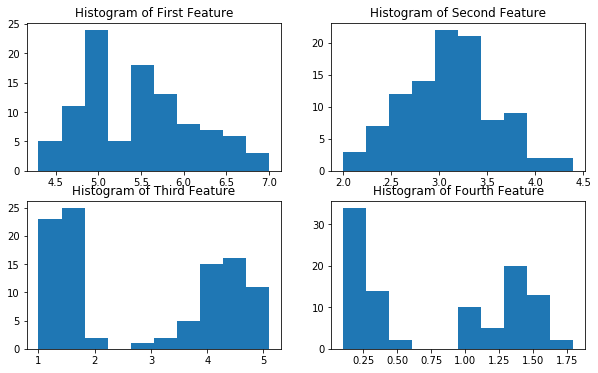

In [88]:
fig = plt.figure(figsize=(10,6))

plt.subplot(221)
plt.hist(df[0])
plt.title('Histogram of First Feature')
plt.subplot(222)
plt.hist(df[1])
plt.title('Histogram of Second Feature')
plt.subplot(223)
plt.hist(df[2])
plt.title('Histogram of Third Feature')
plt.subplot(224)
plt.hist(df[3])
plt.title('Histogram of Fourth Feature')
plt.show()

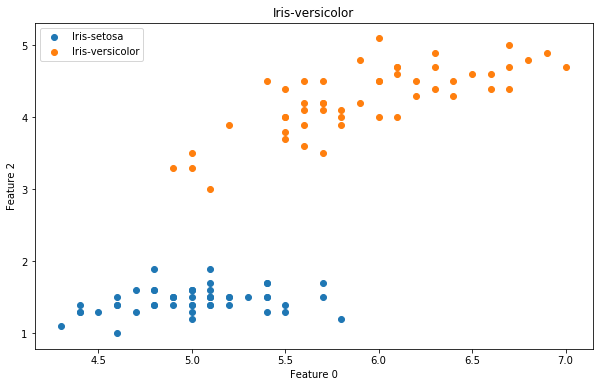

In [89]:
plt.figure(figsize=(10,6))
for i, c in enumerate(classes):
    #plt.subplot(1,3,i+1)
    plt.title(c)
    plt.scatter(df[df[4] == c][0], df[df[4] == c][2], label=c)
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 2')
    plt.legend()

plt.show()

The neural network consists of 2 input neurons (since we have 2 features as input) and one neuron in the hidden layer connected to the output layer with 1 neuron.

In [90]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def derivedSigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

In [105]:
weights1 = np.random.uniform(-0.5, 0.5, size=(3, 1))
weights2 = np.random.uniform(-0.5, 0.5, size=(2, 1))

def forwardPass(x):
    if len(x.shape) == 1:
        x = x.reshape(-1, 1)
    assert x.shape[-1] == 1
    inp = np.append(1, x).T
    hiddenIn = sigmoid(np.dot(inp, weights1))
    hiddenOut = np.append(1, hiddenIn).T
    output = sigmoid(np.dot(hiddenOut, weights2))
    return output

def costFunction(pred, target):
    

In [106]:
data = np.delete(samples, [1, 3], axis=1)
print(data.shape)
print(forwardPass(data[0, :2]))

(100, 3)
[0.47246327]


## Part 2

In [26]:
import scipy.io as sio
monk2 = sio.loadmat('monk2.mat')['monk2']
print(monk2)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 2 1]
 [1 1 1 ... 2 2 1]
 ...
 [3 2 2 ... 4 1 0]
 [3 2 2 ... 4 1 0]
 [3 3 1 ... 4 2 0]]
